In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

df = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/cleaned_data.csv')
df.head(5)

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,MerDateDay
0,11897185,7,2025-01-30 10:22:00,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
1,11897186,21,2025-01-30 10:21:42,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
2,11897187,23,2025-01-30 10:21:56,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
3,11897188,21,2025-01-30 10:21:56,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
4,11897189,23,2025-01-30 10:21:57,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30


In [3]:


def plot_lanes(df):
    # Identify error periods
    start_time = None
    boxes = []

    for index, row in df.iterrows():
        if row['Error'] == 1 and start_time is None:
            start_time = row['MerDate']
            lane = row['LaneNumber']
        elif row['Error'] == 0 and start_time is not None:
            boxes.append((start_time, row['MerDate'], lane))
            start_time = None

    # Handle case where error continues till the end
    if start_time is not None:
        boxes.append((start_time, df['MerDate'].iloc[-1], lane))

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    for start, end, lane in boxes:
        ax.plot([start, end], [lane, lane], color='blue', linewidth=10)

    # Highlight stops with vertical lines
    stop_data = df[df['Stop'] == 1]
    for i, stop_date in enumerate(pd.to_datetime(stop_data['MerDate'])):
        ax.axvline(stop_date, color='red', linestyle='--', label='Stops' if i == 0 else "")

    # Add proxy artist for error periods to legend
    error_patch = mpatches.Patch(color='blue', label='Inactive lane')

    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.set_xlabel('Time in minutes')
    ax.set_ylabel('Lane Number')
    ax.set_title('Inactive lane periods timeline')
    ax.legend(handles=[error_patch] + ax.get_legend_handles_labels()[0])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_lanes(active_lanes)


NameError: name 'active_lanes' is not defined

In [6]:
df = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
df.head(5)

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02


In [7]:
df['time_delta_seconds'] = pd.to_timedelta(df['time_delta']).dt.total_seconds().astype(int)
df.head(5)

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,...,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta,time_delta_seconds
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,...,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02,242
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02,242
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,...,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02,242
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02,242
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,...,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02,242


In [11]:
test = df[df['time_delta_seconds'] < 5000]

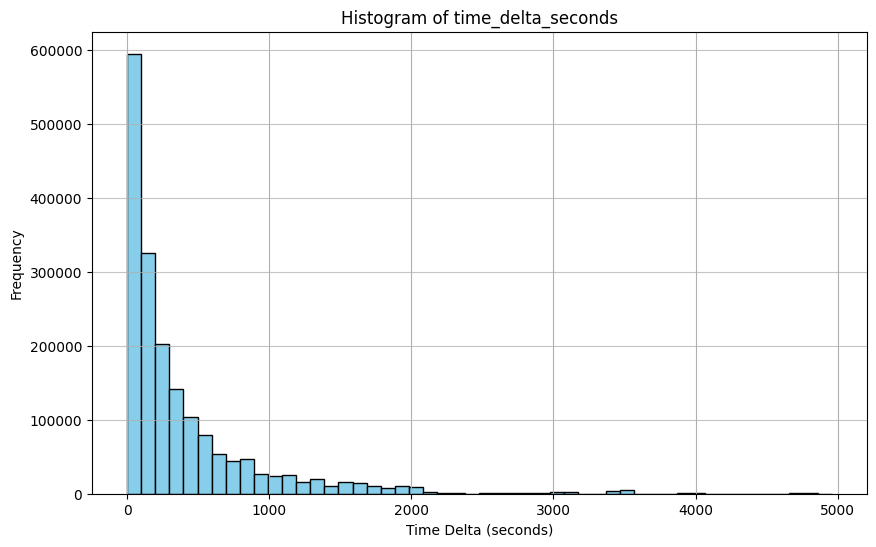

In [12]:
plt.figure(figsize=(10, 6))
test['time_delta_seconds'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of time_delta_seconds')
plt.xlabel('Time Delta (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ik wil een dataset die aangeeft per 10 sec wat de status is per lane (actief of in error), hoeveel totaal in error zijn en of er een stop is ja of nee 

In [4]:
df2 = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/cleaned_data.csv')
df2 = df2[['MerDate', 'MerType', 'MerNumber', 'MerSubNumber']]
df2.head(5)

,MerDate,MerType,MerNumber,MerSubNumber
0,2025-01-30 10:22:00,7,10,22
1,2025-01-30 10:21:42,21,460,12
2,2025-01-30 10:21:56,23,460,12
3,2025-01-30 10:21:56,21,460,12
4,2025-01-30 10:21:57,23,460,12


In [5]:
# Convert MerDate to datetime if not already done
df2['MerDate'] = pd.to_datetime(df2['MerDate'])

df2 = df2.sort_values('MerDate')

# Calculate the window number based on 10-second intervals
df2['window'] = ((df2['MerDate'] - df2['MerDate'].min()).dt.total_seconds() // 10 + 1).astype(int)

# Display the updated dataframe
df2.head(10)

,MerDate,MerType,MerNumber,MerSubNumber,window
1,2025-01-30 10:21:42,21,460,12,1
2,2025-01-30 10:21:56,23,460,12,2
3,2025-01-30 10:21:56,21,460,12,2
4,2025-01-30 10:21:57,23,460,12,2
5,2025-01-30 10:21:57,21,460,12,2
6,2025-01-30 10:21:58,23,460,12,2
0,2025-01-30 10:22:00,7,10,22,2
7,2025-01-30 10:22:01,22,461,12,2
8,2025-01-30 10:22:03,21,460,12,3
9,2025-01-30 10:22:09,21,452,12,3


In [6]:
# Add a 'stop' column based on the condition
df2['stop'] = ((df2['MerType'] == 8) & (df2['MerNumber'] == 0)).astype(int)

# Display the updated DataFrame
df2.head()

,MerDate,MerType,MerNumber,MerSubNumber,window,stop
1,2025-01-30 10:21:42,21,460,12,1,0
2,2025-01-30 10:21:56,23,460,12,2,0
3,2025-01-30 10:21:56,21,460,12,2,0
4,2025-01-30 10:21:57,23,460,12,2,0
5,2025-01-30 10:21:57,21,460,12,2,0


In [7]:
# Create 18 new columns named lane_x_new and initialize them with default values (e.g., 0)
for i in range(1, 19):
    df2[f'lane_{i}_inactive'] = 0
    df2[f'lane_{i}_active'] = 0

# Display the updated DataFrame
df2.head()

,MerDate,MerType,MerNumber,MerSubNumber,window,stop,lane_1_inactive,lane_1_active,lane_2_inactive,lane_2_active,...,lane_14_inactive,lane_14_active,lane_15_inactive,lane_15_active,lane_16_inactive,lane_16_active,lane_17_inactive,lane_17_active,lane_18_inactive,lane_18_active
1,2025-01-30 10:21:42,21,460,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025-01-30 10:21:56,23,460,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2025-01-30 10:21:56,21,460,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2025-01-30 10:21:57,23,460,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2025-01-30 10:21:57,21,460,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Update the lane_x_inactive columns based on the conditions
for index, row in df2.iterrows():
    if row['MerType'] == 21 and row['MerNumber'] >= 400:
        lane = row['MerSubNumber']
        if 1 <= lane <= 18:  # Ensure the lane number is within the valid range
            df2.at[index, f'lane_{lane}_inactive'] = 1

    if row['MerType'] in [23,24] and row['MerNumber'] >= 400:
            lane = row['MerSubNumber']
            if 1 <= lane <= 18:  # Ensure the lane number is within the valid range
                df2.at[index, f'lane_{lane}_active'] = 1

# Display maximum columns for better visibility
pd.set_option('display.max_columns', None)

# Display the updated DataFrame
df2.head()

,MerDate,MerType,MerNumber,MerSubNumber,window,stop,lane_1_inactive,lane_1_active,lane_2_inactive,lane_2_active,lane_3_inactive,lane_3_active,lane_4_inactive,lane_4_active,lane_5_inactive,lane_5_active,lane_6_inactive,lane_6_active,lane_7_inactive,lane_7_active,lane_8_inactive,lane_8_active,lane_9_inactive,lane_9_active,lane_10_inactive,lane_10_active,lane_11_inactive,lane_11_active,lane_12_inactive,lane_12_active,lane_13_inactive,lane_13_active,lane_14_inactive,lane_14_active,lane_15_inactive,lane_15_active,lane_16_inactive,lane_16_active,lane_17_inactive,lane_17_active,lane_18_inactive,lane_18_active
1,2025-01-30 10:21:42,21,460,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2025-01-30 10:21:56,23,460,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2025-01-30 10:21:56,21,460,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2025-01-30 10:21:57,23,460,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2025-01-30 10:21:57,21,460,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Aggregate the data by window
aggregated = df2.groupby('window').agg(
    {f'lane_{i}_inactive': 'sum' for i in range(1, 19)} |
    {f'lane_{i}_active': 'sum' for i in range(1, 19)} |
    {'stop': 'sum'}
).reset_index()

# Calculate the total lanes in error
aggregated['total_lanes_in_error'] = sum(aggregated[f'lane_{i}_inactive'] - aggregated[f'lane_{i}_active'] for i in range(1, 19))

# Display the aggregated DataFrame
aggregated.head()

,window,lane_1_inactive,lane_2_inactive,lane_3_inactive,lane_4_inactive,lane_5_inactive,lane_6_inactive,lane_7_inactive,lane_8_inactive,lane_9_inactive,lane_10_inactive,lane_11_inactive,lane_12_inactive,lane_13_inactive,lane_14_inactive,lane_15_inactive,lane_16_inactive,lane_17_inactive,lane_18_inactive,lane_1_active,lane_2_active,lane_3_active,lane_4_active,lane_5_active,lane_6_active,lane_7_active,lane_8_active,lane_9_active,lane_10_active,lane_11_active,lane_12_active,lane_13_active,lane_14_active,lane_15_active,lane_16_active,lane_17_active,lane_18_active,stop,total_lanes_in_error
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,-1
2,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,-1


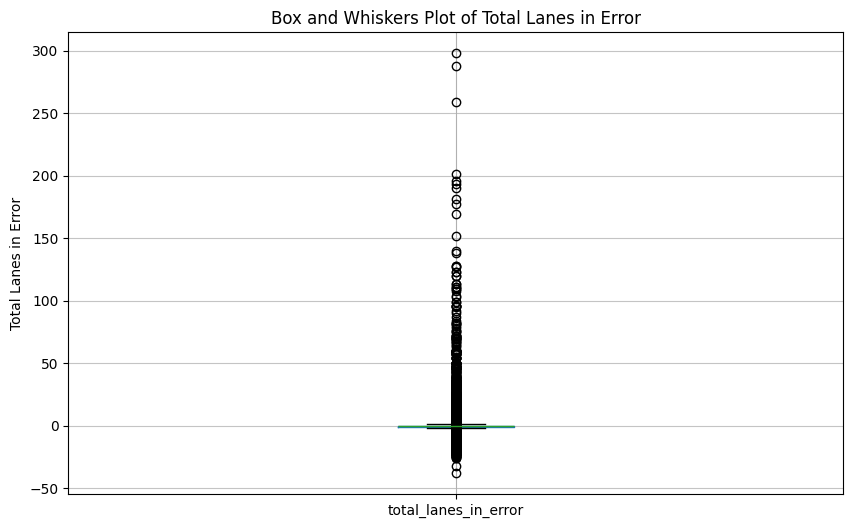

In [10]:
plt.figure(figsize=(10, 6))
aggregated.boxplot(column='total_lanes_in_error')
plt.title('Box and Whiskers Plot of Total Lanes in Error')
plt.ylabel('Total Lanes in Error')
plt.grid(axis='y', alpha=0.75)
plt.show()

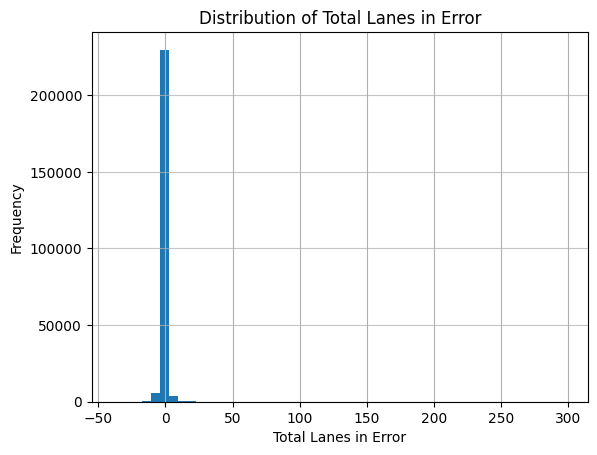

In [11]:
aggregated['total_lanes_in_error'].hist(bins=50)
plt.title('Distribution of Total Lanes in Error')
plt.xlabel('Total Lanes in Error')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

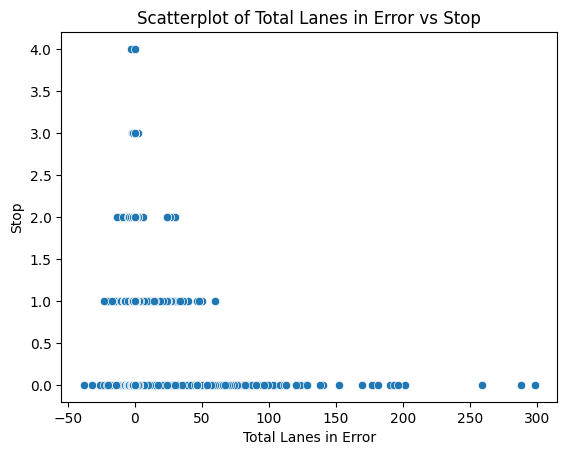

In [12]:
import seaborn as sns

sns.scatterplot(data=aggregated, x='total_lanes_in_error', y='stop')
plt.title('Scatterplot of Total Lanes in Error vs Stop')
plt.xlabel('Total Lanes in Error')
plt.ylabel('Stop')
plt.show()


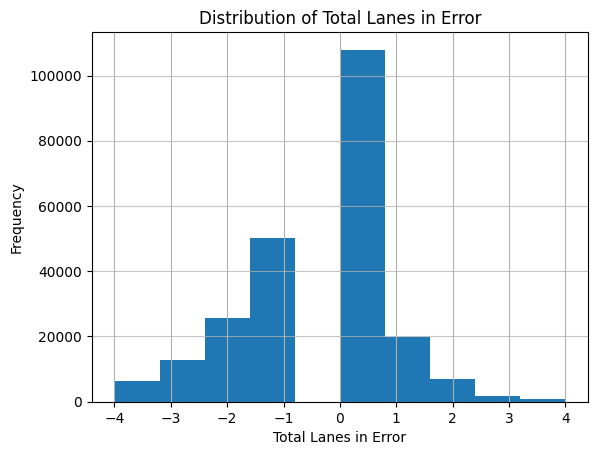

In [16]:
newdf = aggregated[(aggregated['total_lanes_in_error'] > -5) & (aggregated['total_lanes_in_error'] < 5)]
newdf['total_lanes_in_error'].hist(bins=10)
plt.title('Distribution of Total Lanes in Error')
plt.xlabel('Total Lanes in Error')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
pd.set_option('display.max_rows', None)
df2[df2['window'] == 179955]

,MerDate,MerType,MerNumber,MerSubNumber,window,stop,lane_1_inactive,lane_1_active,lane_2_inactive,lane_2_active,lane_3_inactive,lane_3_active,lane_4_inactive,lane_4_active,lane_5_inactive,lane_5_active,lane_6_inactive,lane_6_active,lane_7_inactive,lane_7_active,lane_8_inactive,lane_8_active,lane_9_inactive,lane_9_active,lane_10_inactive,lane_10_active,lane_11_inactive,lane_11_active,lane_12_inactive,lane_12_active,lane_13_inactive,lane_13_active,lane_14_inactive,lane_14_active,lane_15_inactive,lane_15_active,lane_16_inactive,lane_16_active,lane_17_inactive,lane_17_active,lane_18_inactive,lane_18_active
472732,2025-02-20 06:14:02,21,401,1,179955,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472731,2025-02-20 06:14:02,23,98,5,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472730,2025-02-20 06:14:02,21,411,18,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
472729,2025-02-20 06:14:02,21,411,17,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
472724,2025-02-20 06:14:02,21,411,14,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
472727,2025-02-20 06:14:02,21,411,16,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
472726,2025-02-20 06:14:02,21,411,15,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
472725,2025-02-20 06:14:02,23,127,0,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472733,2025-02-20 06:14:02,21,401,2,179955,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472728,2025-02-20 06:14:02,23,98,3,179955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
